In [1]:
import pandas as pd
from src.constants import Column
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

run_id = 'fxk3lmiz'
run_name = 'ctvae-conditional_wasserstein8'
fname = f'{run_name}_{run_id}'
df_sc = pd.read_pickle(f'/home/wangz222/scratch/embedding/{fname}.pkl')

perturbed_train = pd.read_pickle('/home/wangz222/scratch/splits_shuffled/perturbed_train.pkl')[[Column.sgRNA.value, Column.gene.value]]
perturbed_val = pd.read_pickle('/home/wangz222/scratch/splits_shuffled/perturbed_val.pkl')[[Column.sgRNA.value, Column.gene.value]]
perturbed_test = pd.read_pickle('/home/wangz222/scratch/splits_shuffled/perturbed_test.pkl')[[Column.sgRNA.value, Column.gene.value]]
ntc_train = pd.read_pickle('/home/wangz222/scratch/splits_shuffled/ntc_train.pkl')[[Column.sgRNA.value, Column.gene.value]]
ntc_val = pd.read_pickle('/home/wangz222/scratch/splits_shuffled/ntc_val.pkl')[[Column.sgRNA.value, Column.gene.value]]
ntc_test = pd.read_pickle('/home/wangz222/scratch/splits_shuffled/ntc_test.pkl')[[Column.sgRNA.value, Column.gene.value]]

In [2]:
perturbed_train['split'] = 'train'
perturbed_val['split'] = 'val'
perturbed_test['split'] = 'test'
ntc_train['split'] = 'train'
ntc_val['split'] = 'val'
ntc_test['split'] = 'test'

metadata = pd.concat([perturbed_train, perturbed_val, perturbed_test, ntc_train, ntc_val, ntc_test]).reset_index(drop=True)

if metadata[[Column.sgRNA.value, Column.gene.value]].equals(df_sc[[Column.sgRNA.value, Column.gene.value]]):
    print('Metadata is in the same order as the original dataset')

Metadata is in the same order as the original dataset


In [25]:
# Step 1: Standardization
scaler = StandardScaler()
standardized_train_data = scaler.fit_transform(df_sc.loc[metadata['split']=='train'].iloc[::1000,2:])

# Note: Transform the test data using the same mean and variance as the training data
standardized_test_data = scaler.transform(df_sc.loc[metadata['split']=='test'].iloc[::150,2:])

# Step 2: PCA on the training data
pca = PCA(n_components=2)
principal_components_train = pca.fit_transform(standardized_train_data)

# Apply the same PCA transformation to the test data
principal_components_test = pca.transform(standardized_test_data)

# Create DataFrames with the principal components
principal_train_df = pd.DataFrame(data=principal_components_train, columns=['Principal Component 1', 'Principal Component 2'])
principal_test_df = pd.DataFrame(data=principal_components_test, columns=['Principal Component 1', 'Principal Component 2'])

In [26]:
import matplotlib.pyplot as plt

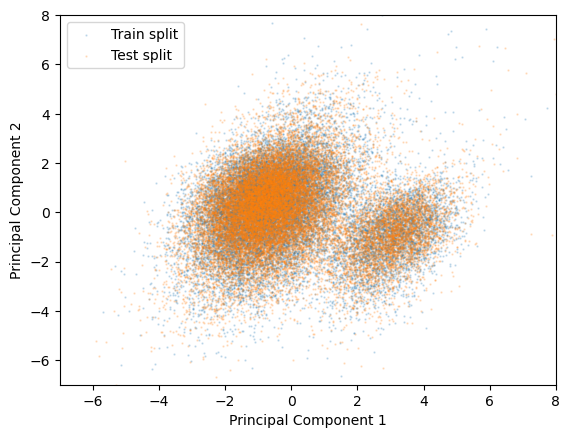

In [30]:
# Scatter plot for the training data (principal components)
plt.scatter(principal_train_df['Principal Component 1'], principal_train_df['Principal Component 2'], label='Train split', alpha=0.2, s=0.5)
# Scatter plot for the test data (principal components)
plt.scatter(principal_test_df['Principal Component 1'], principal_test_df['Principal Component 2'], label='Test split', alpha=0.2, s=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.xlim(-7, 8)
plt.ylim(-7, 8)
plt.savefig('figure/overfit_check.svg')
plt.show()